## Interaction effects

## Random Forest model

6
7
12
R² Score: 0.7322
Adjusted R² Score: 0.7306
Mean Absolute Percentage Error (MAPE): 12.1118%
R² Score: 0.9302
Adjusted R² Score: 0.9297
Mean Absolute Percentage Error (MAPE): 5.8841%
R² Score: 0.9609
Adjusted R² Score: 0.9605
Mean Absolute Percentage Error (MAPE): 4.3551%


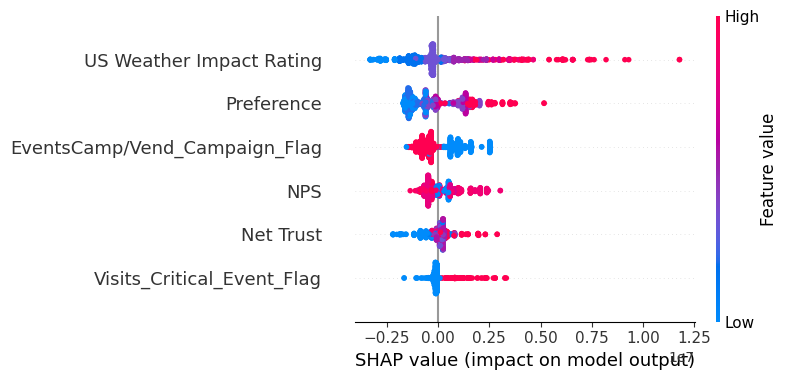

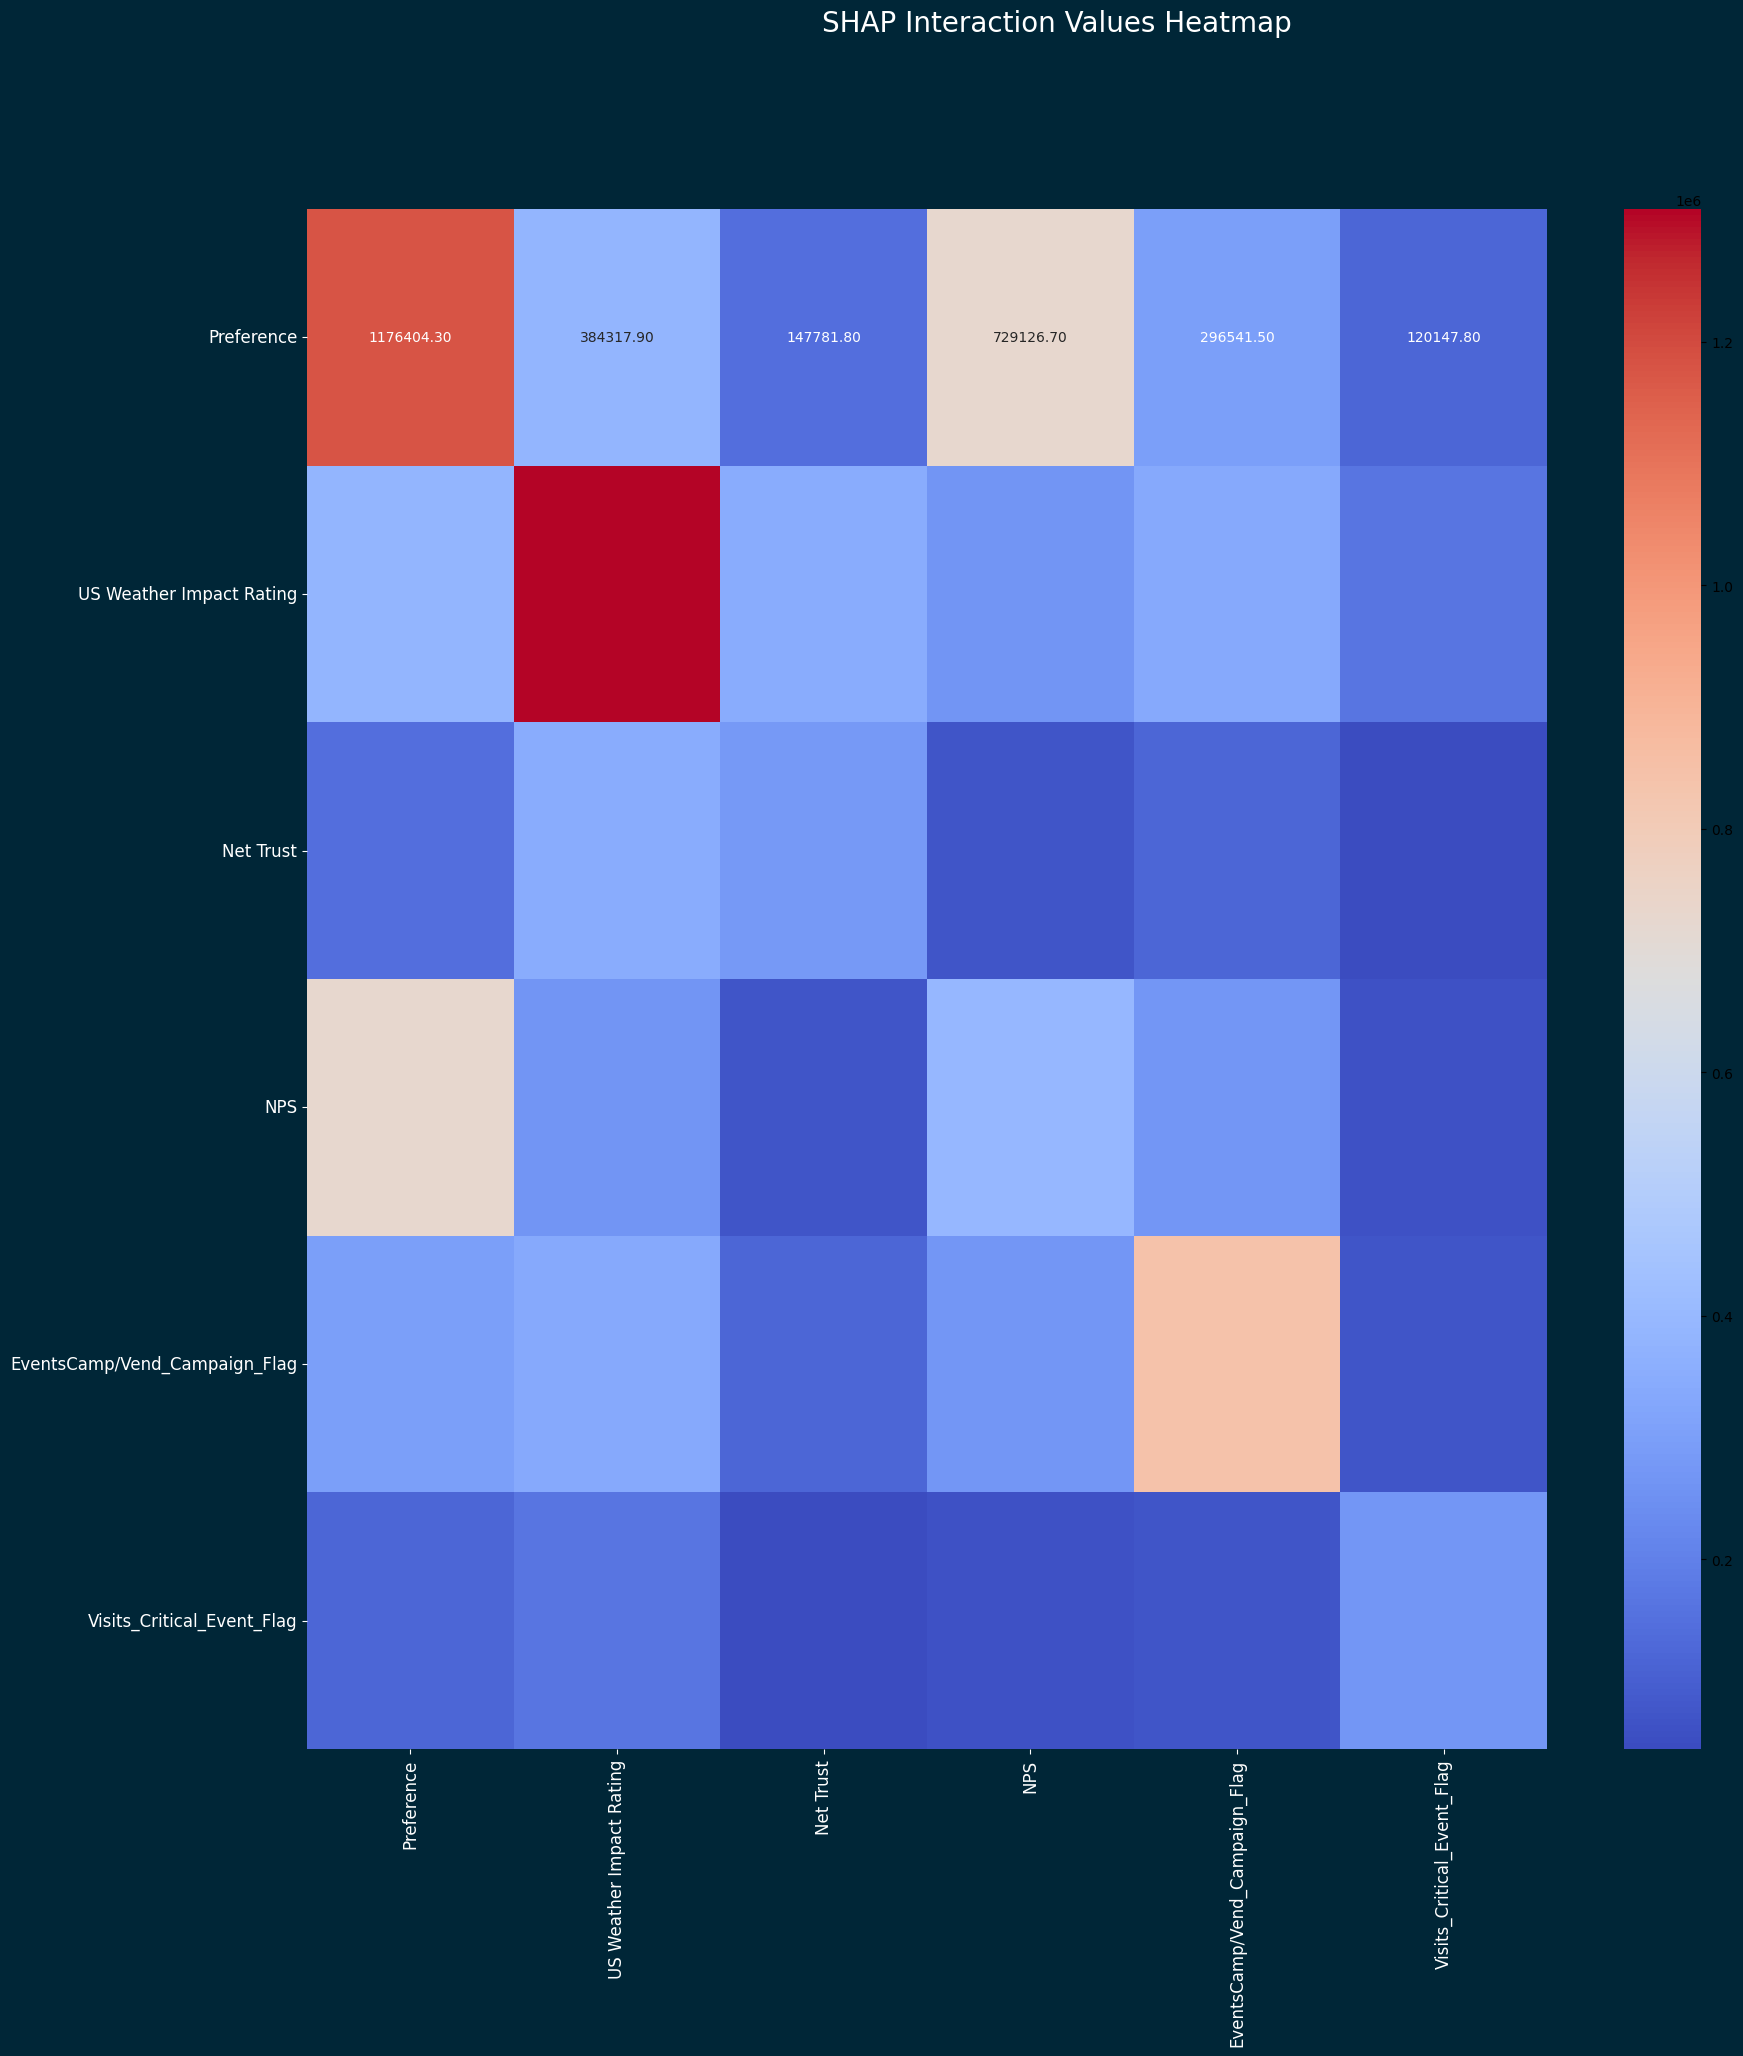

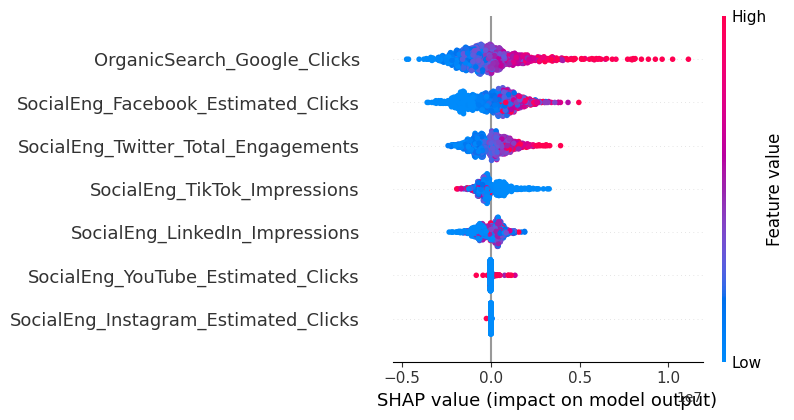

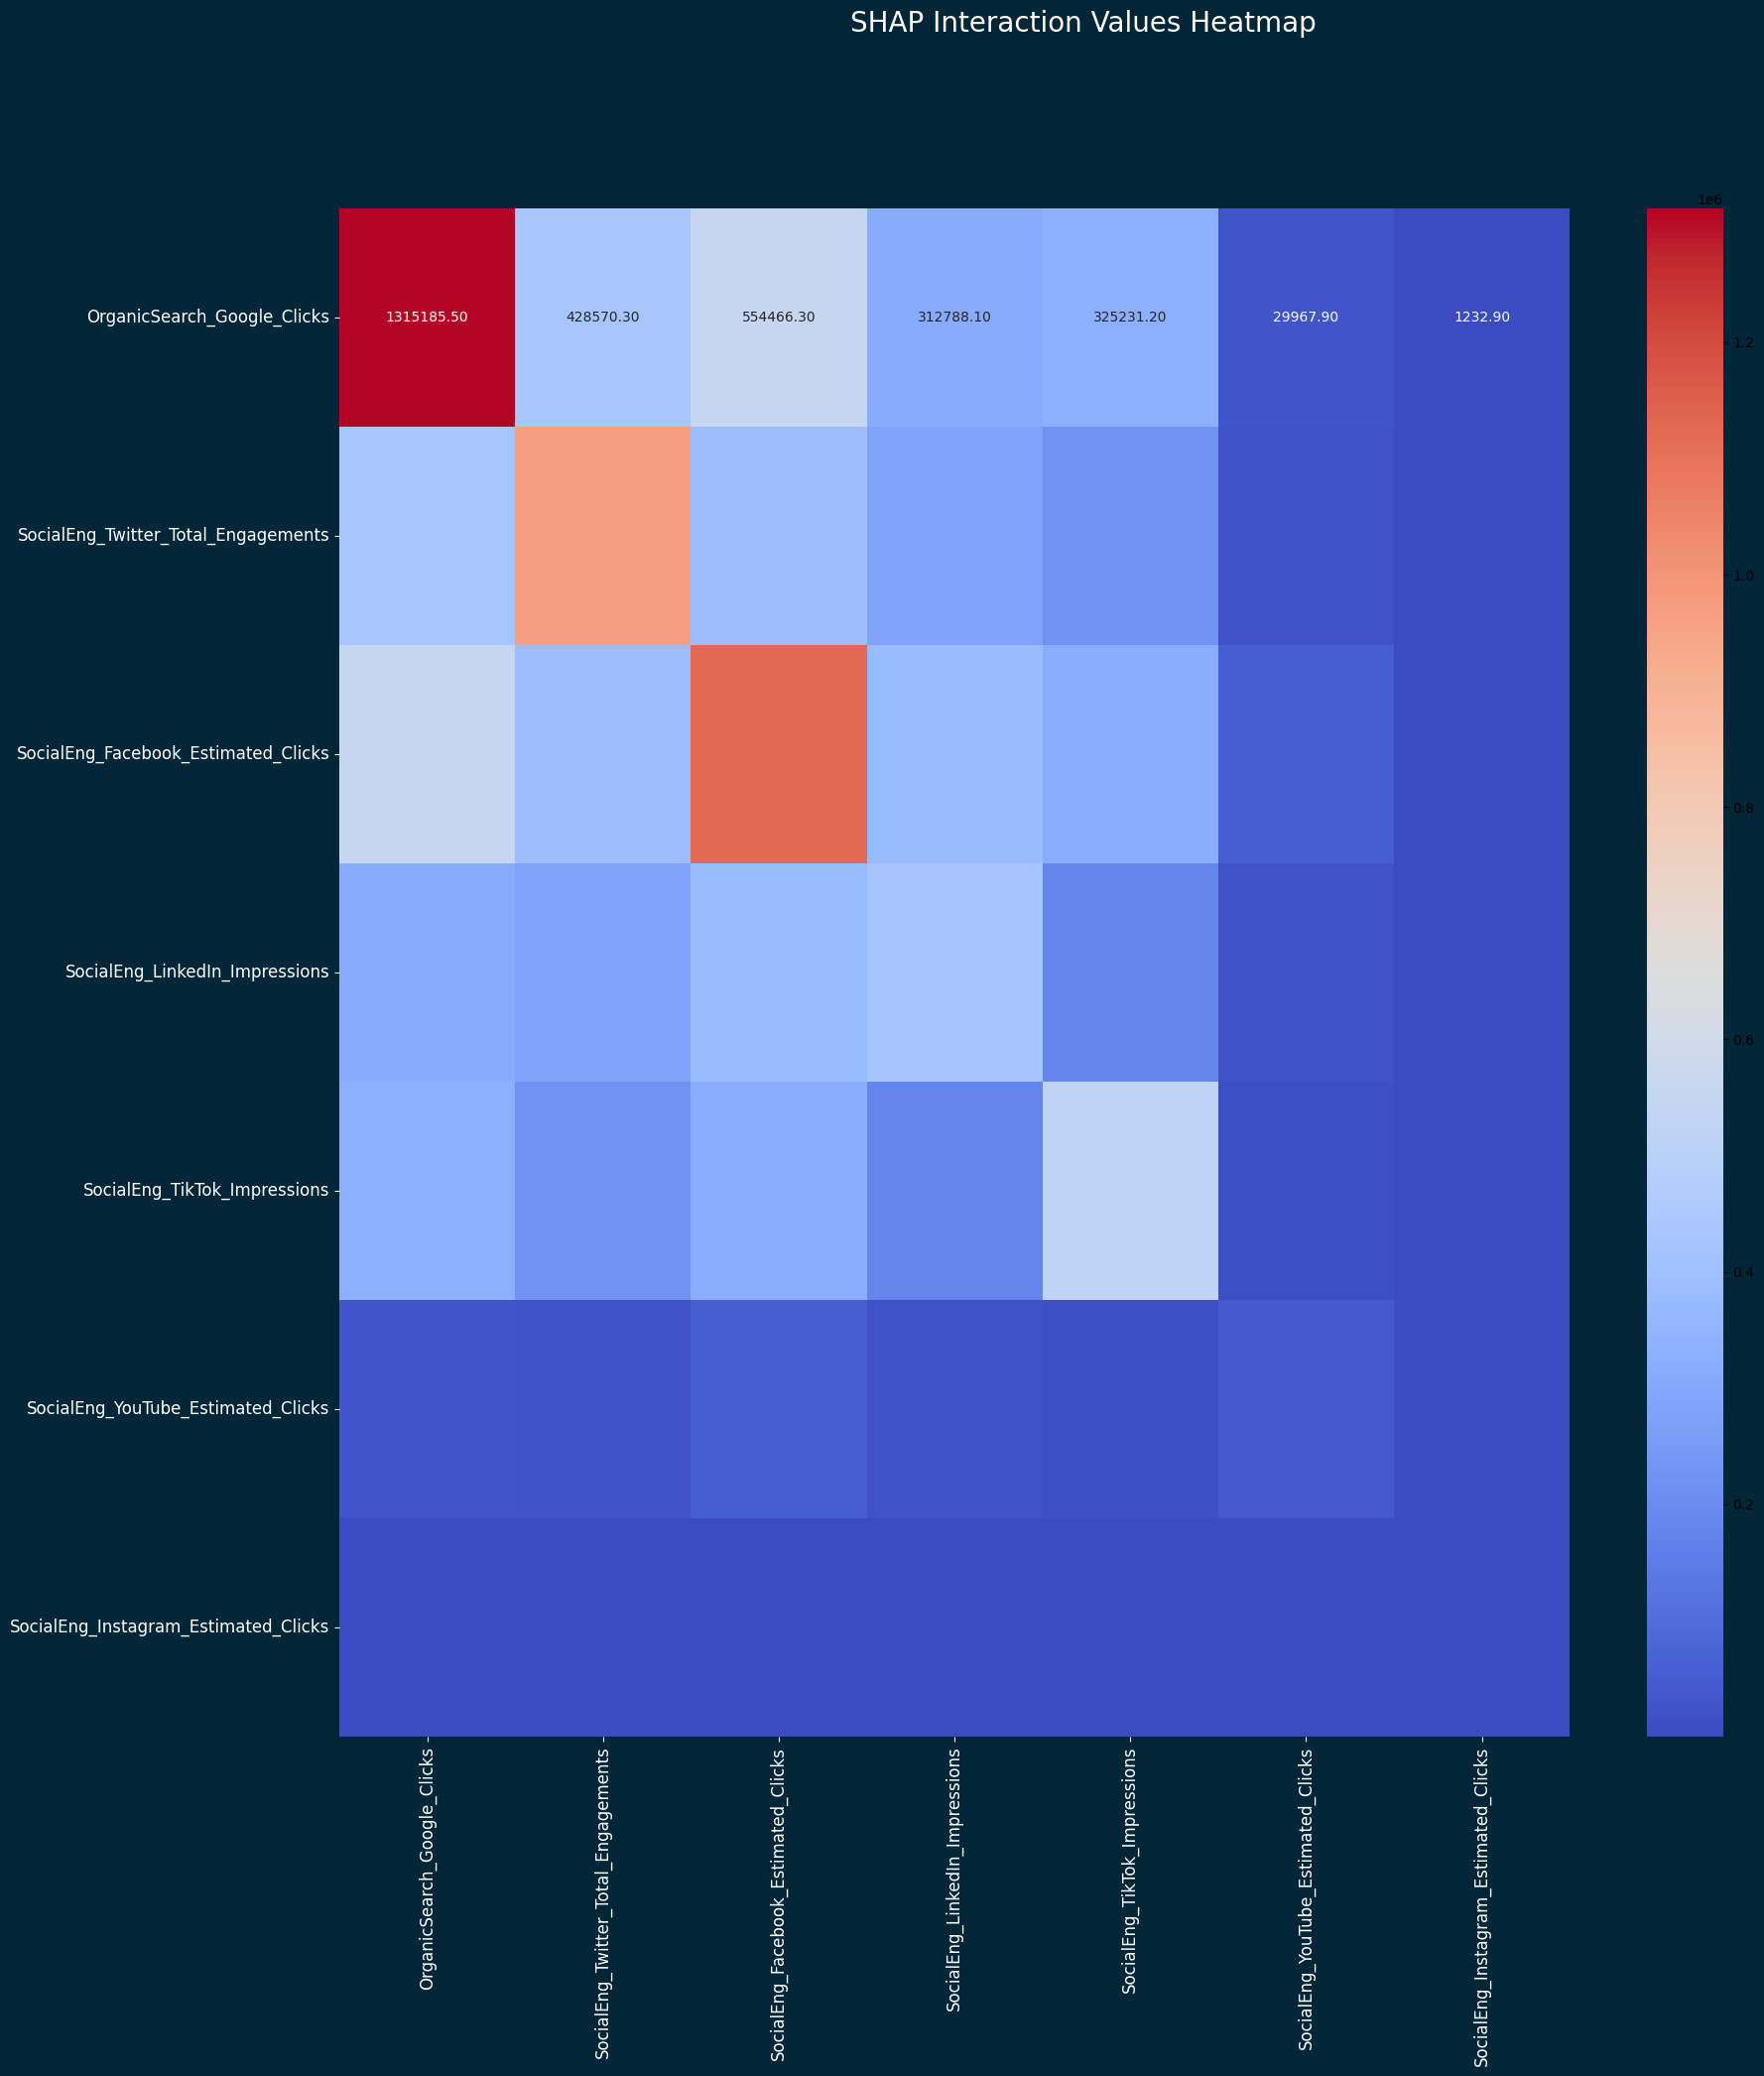

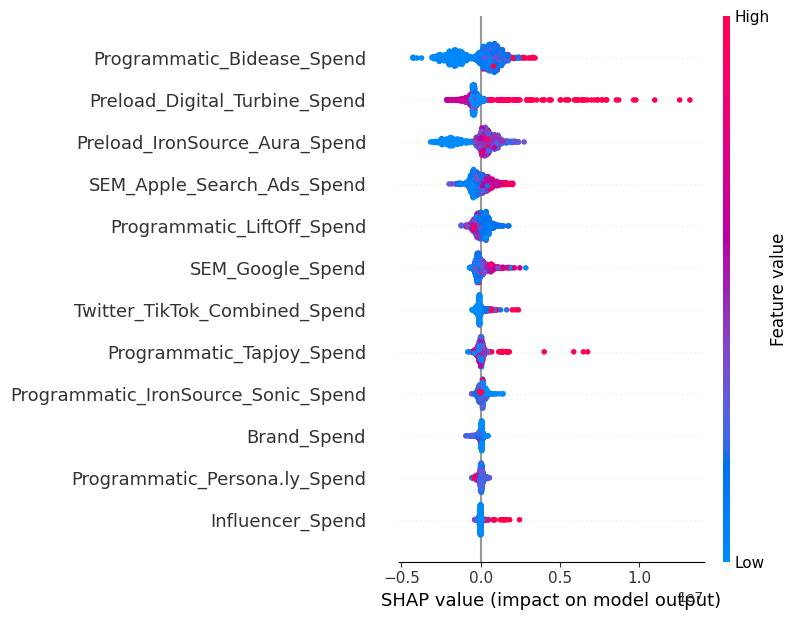

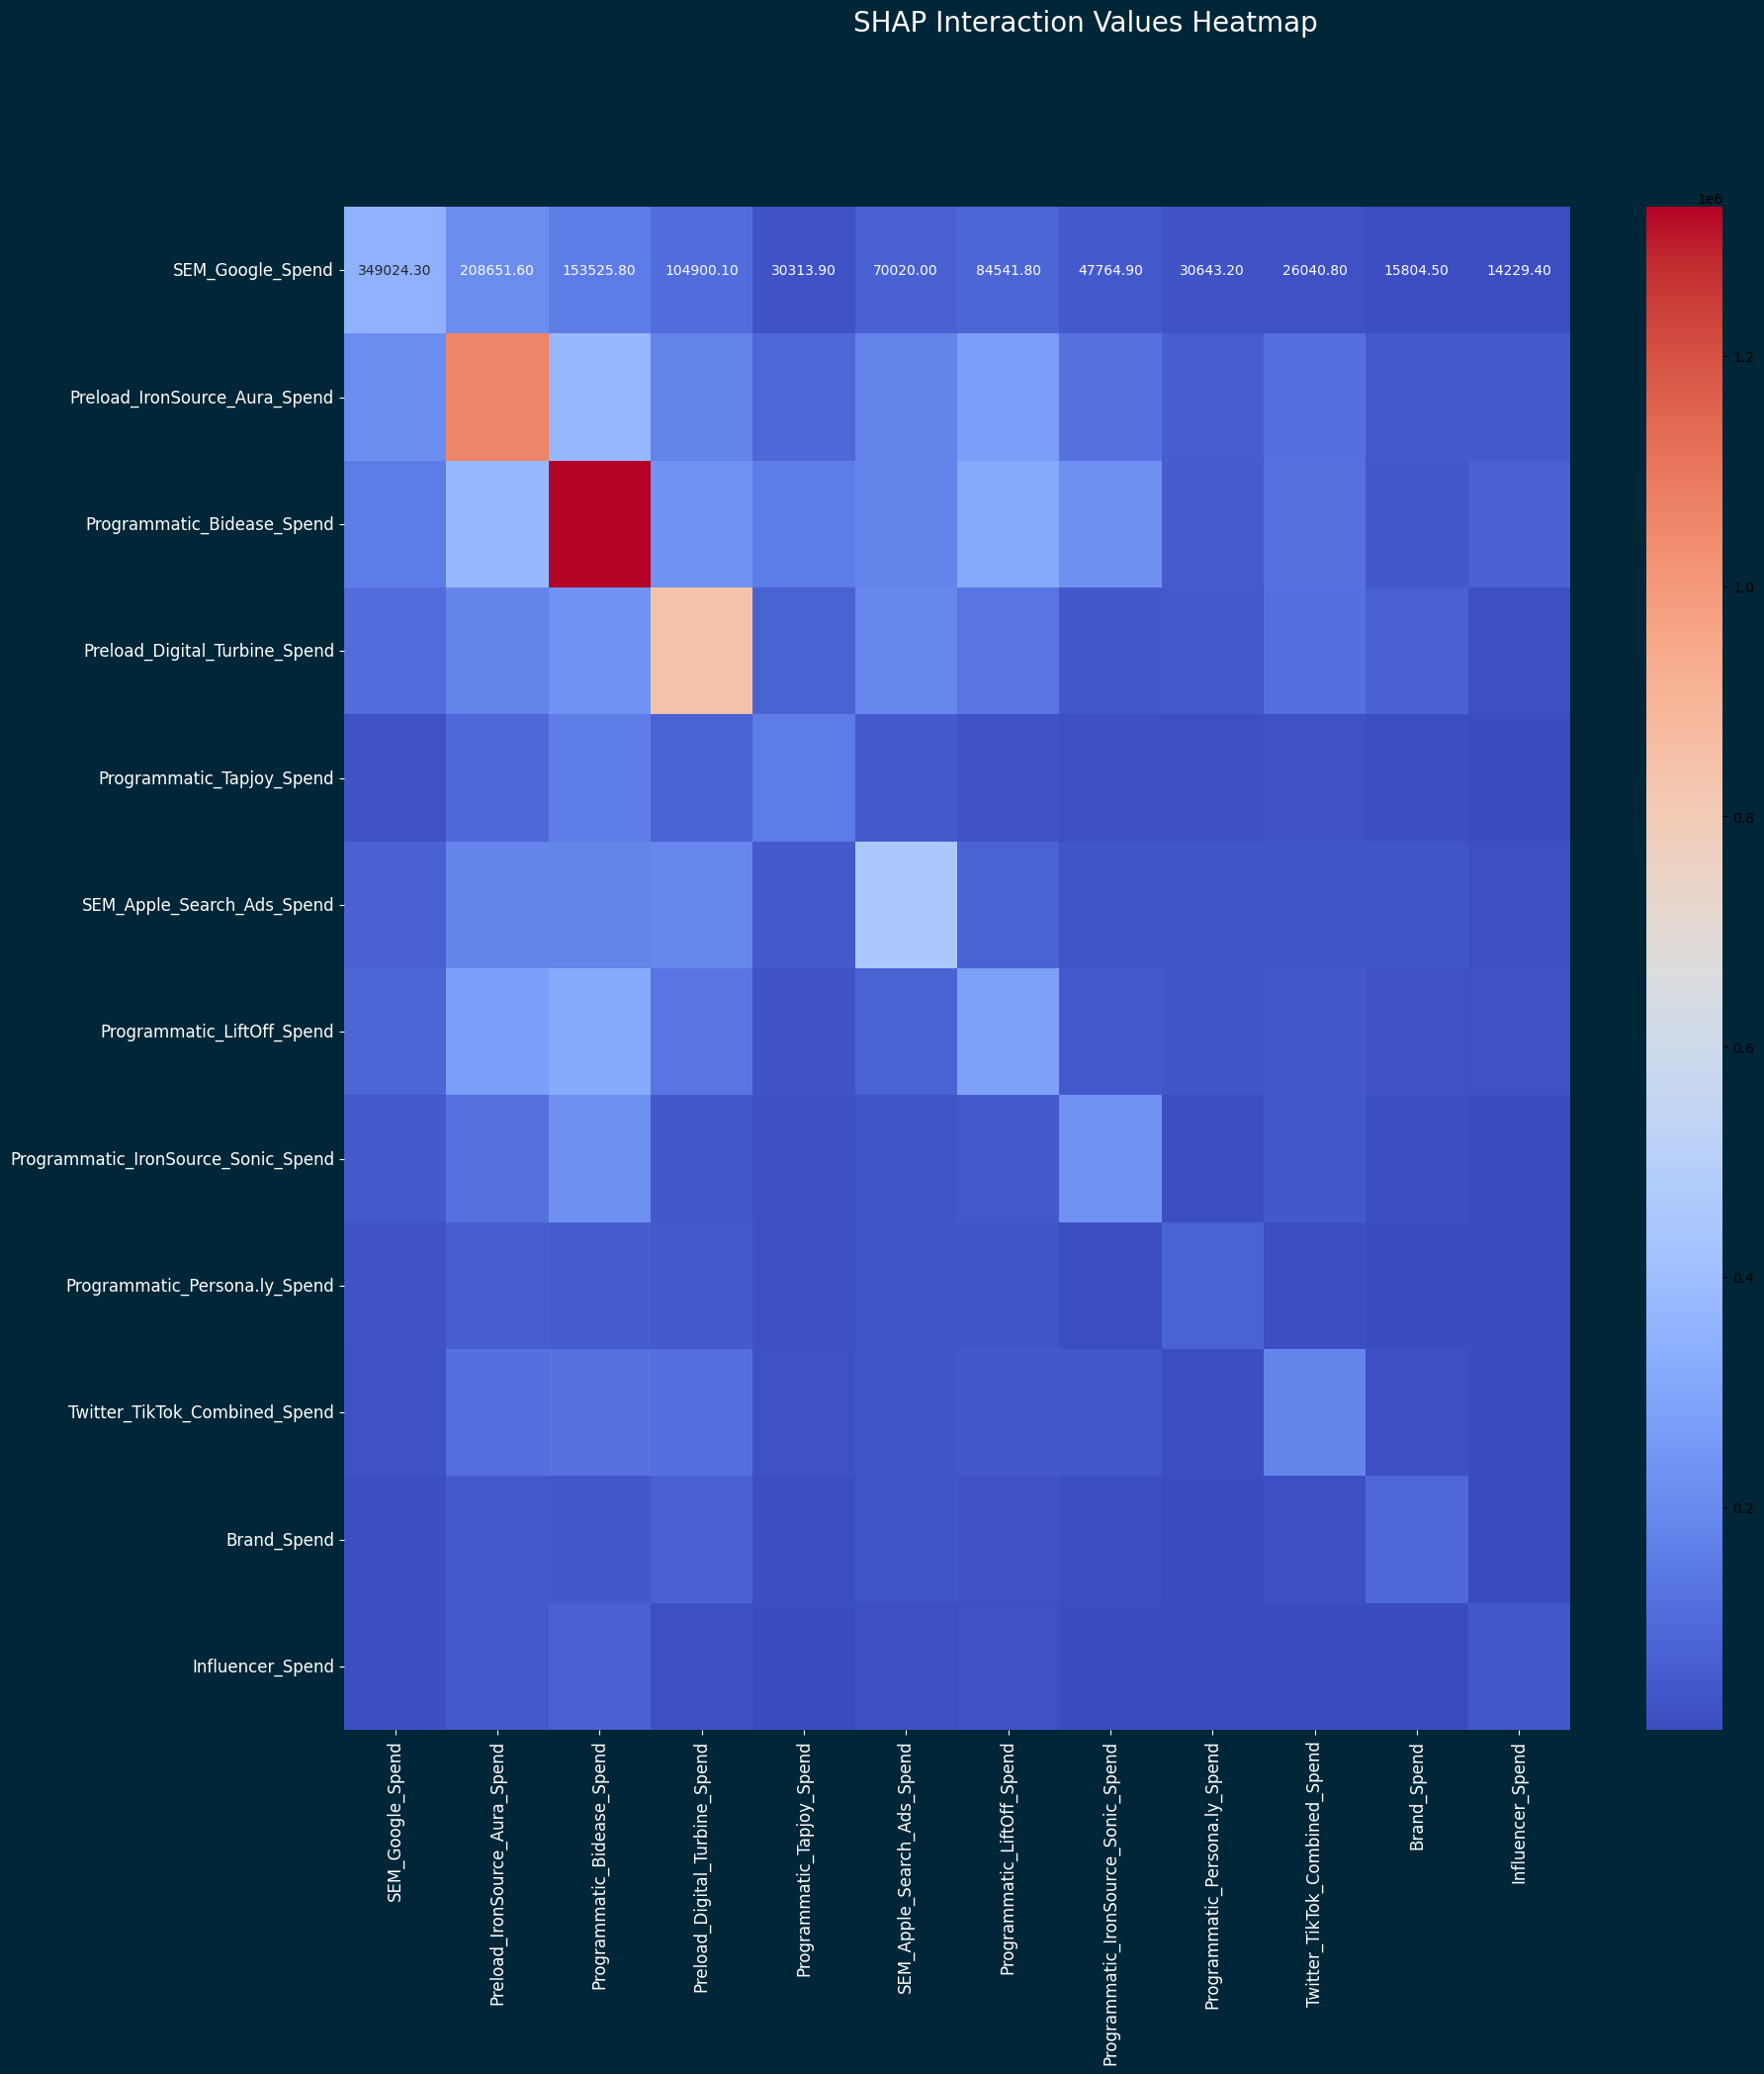

In [27]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load your dataset
df = pd.read_csv("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Data_for_MMM.csv")

# Define the column groups
base_cols = ['Preference', 'US Weather Impact Rating', 'Net Trust', 'NPS', 'EventsCamp/Vend_Campaign_Flag', 'Visits_Critical_Event_Flag']
organic_cols = ['OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
paid_media_cols = ['SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend']

print(len(base_cols))
print(len(organic_cols))
print(len(paid_media_cols))

# Remove the target column from base_cols to avoid redundancy
base_cols_no_target = [col for col in base_cols if col != 'dep_var']

# Prepare data for each group
X_base = df[base_cols_no_target].values
X_organic = df[organic_cols].values
X_paid = df[paid_media_cols].values
y = df['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Function to train model and calculate SHAP values
def train_and_shap(X, y, feature_names):
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predict on the entire dataset
    y_pred = rf_model.predict(X)

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Calculate Adjusted R²
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

    # Use SHAP to calculate SHAP values
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X)

    # Calculate SHAP interaction values
    interaction_values = explainer.shap_interaction_values(X)

    # Compute mean SHAP interaction values across all samples
    mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

    # Return SHAP values and the mean interaction values
    return shap_values, mean_interaction_values

# Train and get SHAP values for each group
shap_values_base, mean_interaction_base = train_and_shap(X_base, y, base_cols_no_target)
shap_values_organic, mean_interaction_organic = train_and_shap(X_organic, y, organic_cols)
shap_values_paid, mean_interaction_paid = train_and_shap(X_paid, y, paid_media_cols)

# Function to plot SHAP interaction heatmap
def plot_shap_interaction_heatmap(mean_interaction_values, feature_names):
    df_shap = pd.DataFrame(mean_interaction_values, index=feature_names, columns=feature_names)

    # Multiply off-diagonal elements by 2
    for i in range(len(df_shap)):
        for j in range(len(df_shap)):
            if i != j:
                df_shap.iloc[i, j] *= 2

    # Create the heatmap
    fig = plt.figure(figsize=(20, 20), facecolor='#002637', edgecolor='r')
    ax = fig.add_subplot()
    sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
                annot_kws={"size": 10})  # Adjust annotation font size as needed
    ax.tick_params(axis='x', colors='w', labelsize=12, rotation=90)  # Adjust tick label size and rotation
    ax.tick_params(axis='y', colors='w', labelsize=12)

    plt.suptitle("SHAP Interaction Values Heatmap", color="white", fontsize=20, y=0.98)
    plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
    plt.show()

# Plot SHAP summary plots and interaction heatmaps for each group
shap.summary_plot(shap_values_base, features=X_base, feature_names=base_cols_no_target)
plot_shap_interaction_heatmap(mean_interaction_base, base_cols_no_target)

shap.summary_plot(shap_values_organic, features=X_organic, feature_names=organic_cols)
plot_shap_interaction_heatmap(mean_interaction_organic, organic_cols)

shap.summary_plot(shap_values_paid, features=X_paid, feature_names=paid_media_cols)
plot_shap_interaction_heatmap(mean_interaction_paid, paid_media_cols)



## Random Forest Model just Base, Paid & Organic

R² Score: 0.9344
Adjusted R² Score: 0.9342
Mean Absolute Percentage Error (MAPE): 5.1297%


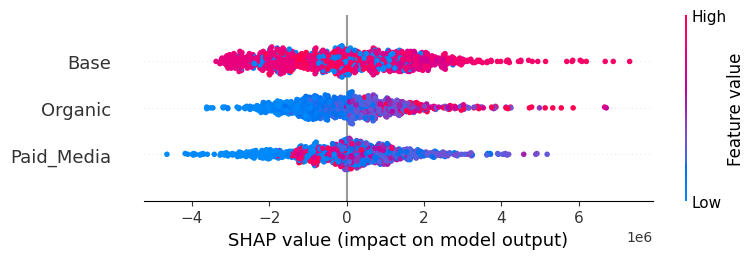

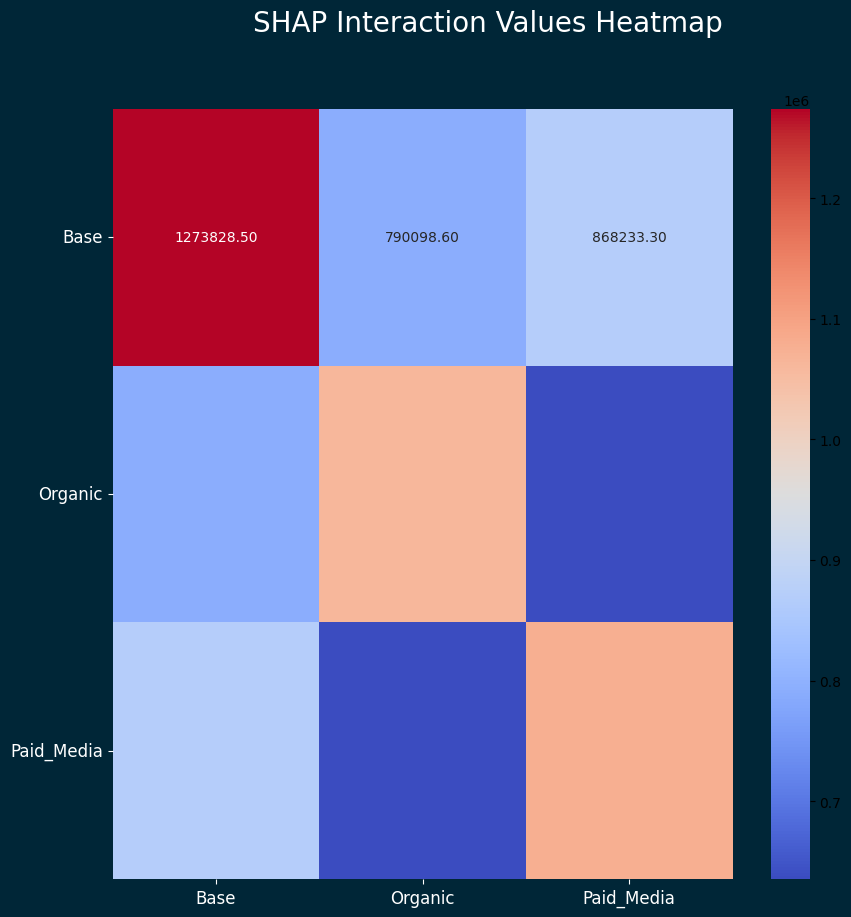

SHAP Values DataFrame:
              Base       Organic    Paid_Media
0    -2.213858e+05  3.028800e+06  3.234977e+06
1     1.634169e+06 -8.187365e+04  6.776377e+05
2     6.939657e+05 -9.639893e+05 -1.117489e+06
3     7.389921e+05 -2.025882e+06 -8.712664e+04
4     9.325911e+05 -2.243883e+06  3.229196e+05
...            ...           ...           ...
999  -1.585289e+06  8.525612e+05  4.801975e+05
1000 -1.970332e+06  1.112657e+06  5.012573e+05
1001 -1.699697e+06 -1.087092e+06  1.529101e+06
1002 -2.517923e+06 -4.275427e+05  2.350776e+05
1003 -1.797028e+06 -1.163638e+06  2.171589e+06

[1004 rows x 3 columns]

Mean SHAP Interaction Values DataFrame:
                    Base       Organic    Paid_Media
Base        1.273828e+06  7.900986e+05  8.682333e+05
Organic     7.900986e+05  1.062887e+06  6.354403e+05
Paid_Media  8.682333e+05  6.354403e+05  1.077282e+06


In [33]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Load your dataset
df = pd.read_csv("C:\\Users\\DeepakArun\\Desktop\\TWC new\\Data_for_MMM.csv")

# Define the column groups
base_cols = ['Preference', 'US Weather Impact Rating', 'Net Trust', 'NPS', 'EventsCamp/Vend_Campaign_Flag', 'Visits_Critical_Event_Flag']
organic_cols = ['OrganicSearch_Google_Clicks', 'SocialEng_Twitter_Total_Engagements', 'SocialEng_Facebook_Estimated_Clicks', 'SocialEng_LinkedIn_Impressions', 'SocialEng_TikTok_Impressions', 'SocialEng_YouTube_Estimated_Clicks', 'SocialEng_Instagram_Estimated_Clicks']
paid_media_cols = ['SEM_Google_Spend', 'Preload_IronSource_Aura_Spend', 'Programmatic_Bidease_Spend', 'Preload_Digital_Turbine_Spend', 'Programmatic_Tapjoy_Spend', 'SEM_Apple_Search_Ads_Spend', 'Programmatic_LiftOff_Spend', 'Programmatic_IronSource_Sonic_Spend', 'Programmatic_Persona.ly_Spend', 'Twitter_TikTok_Combined_Spend', 'Brand_Spend', 'Influencer_Spend']

# Combine the features into their respective categories
df['Base'] = df[base_cols].sum(axis=1)
df['Organic'] = df[organic_cols].sum(axis=1)
df['Paid_Media'] = df[paid_media_cols].sum(axis=1)

# Prepare the final DataFrame
df_final = df[['Base', 'Organic', 'Paid_Media', 'Overall_Web_Visits']]

# Prepare data for the aggregated columns
X_combined = df_final[['Base', 'Organic', 'Paid_Media']].values
y = df_final['Overall_Web_Visits'].values  # Assuming 'Overall_Web_Visits' is the target variable

# Function to train model and calculate SHAP values
def train_and_shap(X, y, feature_names):
    # Train Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X, y)

    # Predict on the entire dataset
    y_pred = rf_model.predict(X)

    # Calculate R² score
    r2 = r2_score(y, y_pred)

    # Calculate Adjusted R²
    n = len(y)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    # Calculate MAPE
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f"R² Score: {r2:.4f}")
    print(f"Adjusted R² Score: {adj_r2:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

    # Use SHAP to calculate SHAP values
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X)

    # Calculate SHAP interaction values
    interaction_values = explainer.shap_interaction_values(X)

    # Compute mean SHAP interaction values across all samples
    mean_interaction_values = np.mean(np.abs(interaction_values), axis=0)

    # Return SHAP values and the mean interaction values
    return shap_values, mean_interaction_values

# Train and get SHAP values for the combined columns
shap_values_combined, mean_interaction_combined = train_and_shap(X_combined, y, ['Base', 'Organic', 'Paid_Media'])

# Convert SHAP values and interaction values to DataFrames
shap_values_df = pd.DataFrame(shap_values_combined, columns=['Base', 'Organic', 'Paid_Media'])
mean_interaction_df = pd.DataFrame(mean_interaction_combined, index=['Base', 'Organic', 'Paid_Media'], columns=['Base', 'Organic', 'Paid_Media'])

# Function to plot SHAP interaction heatmap
def plot_shap_interaction_heatmap(mean_interaction_values, feature_names):
    df_shap = pd.DataFrame(mean_interaction_values, index=feature_names, columns=feature_names)

    # Multiply off-diagonal elements by 2
    for i in range(len(df_shap)):
        for j in range(len(df_shap)):
            if i != j:
                df_shap.iloc[i, j] *= 2

    # Create the heatmap
    fig = plt.figure(figsize=(10, 10), facecolor='#002637', edgecolor='r')
    ax = fig.add_subplot()
    sns.heatmap(df_shap.round(decimals=1), cmap='coolwarm', annot=True, fmt='.2f', cbar=True, ax=ax,
                annot_kws={"size": 10})  # Adjust annotation font size as needed
    ax.tick_params(axis='x', colors='w', labelsize=12, rotation=0)  # Adjust tick label size and rotation
    ax.tick_params(axis='y', colors='w', labelsize=12)

    plt.suptitle("SHAP Interaction Values Heatmap", color="white", fontsize=20, y=0.98)
    plt.yticks(rotation=0)  # Adjust y-axis labels rotation if needed
    plt.show()

# Plot SHAP summary plot and interaction heatmap for the combined columns
shap.summary_plot(shap_values_combined, features=X_combined, feature_names=['Base', 'Organic', 'Paid_Media'])
plot_shap_interaction_heatmap(mean_interaction_combined, ['Base', 'Organic', 'Paid_Media'])

# Display the SHAP values DataFrame and interaction values DataFrame
print("SHAP Values DataFrame:")
print(shap_values_df)
print("\nMean SHAP Interaction Values DataFrame:")
print(mean_interaction_df)


In [37]:
mean_interaction_df

,Base,Organic,Paid_Media
Base,1.273828e+06,7.900986e+05,8.682333e+05
Organic,7.900986e+05,1.062887e+06,6.354403e+05
Paid_Media,8.682333e+05,6.354403e+05,1.077282e+06


In [34]:
df_shap= mean_interaction_df.fillna(0)
# Initialize an empty DataFrame for the normalized data
df_normalized = pd.DataFrame()

# Apply min-max normalization to each column
for column in df_shap.columns:
    min_value = df_shap[column].min()
    max_value = df_shap[column].max()
    df_normalized[column] = (df_shap[column] - min_value) / (max_value - min_value) * 100

df_normalized

,Base,Organic,Paid_Media
Base,100.000000,36.181921,52.686995
Organic,0.000000,100.000000,0.000000
Paid_Media,16.152556,0.000000,100.000000
